In [26]:
import sys
import os
from scipy import stats
from bioinfokit.analys import get_data, stat

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))


#Import block from src
from src.util.helper import read_data,convert_to_pkl
from src.util.preparator import union,prepare_training

In [81]:
prepared_data = union(read_data())

union df


In [83]:
protein = union(read_data())['protein_50']

union df


In [98]:
def bonf_corr_t_test(prepared_data,alpha):
    df1,df0 = prepared_data[prepared_data['target'] == 1].set_index('Unnamed: 0').drop('target',axis=1),prepared_data[prepared_data['target'] == 0].set_index('Unnamed: 0').drop('target',axis=1)
    counter = 0
            
    alpha_bonf = alpha/len(df1.columns)
    
    liste = []
    for i in df1.columns:
        stat, pvalue = stats.ttest_ind(df1[i],df0[i],equal_var = False)
        print('pvalue of {} : '.format(i) + str(pvalue))
        
        if pvalue <= alpha_bonf:
            counter+=1
            liste.append(i)
            
    print(counter)
    return liste

In [114]:
prepared_data['protein_50'][prepared_data['protein_50']['target'] == 0]['X610'].mean()

0.402

In [100]:
dic = {}
for k,v in prepared_data.items(): 
    dic[k] = bonf_corr_t_test(prepared_data[k],0.05)

pvalue of X1 : 0.0027419004658101225
pvalue of X2 : 0.009555967965568592
pvalue of X3 : 7.858647905156416e-05
pvalue of X4 : 0.003430959738861653
pvalue of X5 : 0.00031137157955026424
pvalue of X6 : 3.7627459649317344e-05
pvalue of X7 : 5.952656305888277e-05
pvalue of X8 : 0.00021489022221703663
pvalue of X9 : 7.015155813745261e-05
pvalue of X10 : 0.00029585160123838663
pvalue of X11 : 2.540640602280153e-05
pvalue of X12 : 1.874629001030525e-11
pvalue of X13 : 9.382144283640334e-06
pvalue of X14 : 8.838867361104865e-05
pvalue of X15 : 0.00018147314792616635
pvalue of X16 : 1.5612854067219286e-05
pvalue of X17 : 3.112044977748692e-07
pvalue of X18 : 2.3309112875095547e-06
pvalue of X19 : 9.278609891930787e-08
pvalue of X20 : 3.5825464653405427e-06
pvalue of X21 : 5.534782947656904e-07
pvalue of X22 : 6.518875940754604e-05
pvalue of X23 : 0.07278565371612189
pvalue of X24 : 1.3168568255218435e-10
pvalue of X25 : 0.0012060208319385685
pvalue of X26 : 0.001714902085710997
pvalue of X27 : 0

In [95]:
dic

{'dna_50': ['X12',
  'X13',
  'X16',
  'X17',
  'X18',
  'X19',
  'X20',
  'X21',
  'X24',
  'X29',
  'X30',
  'X31',
  'X32',
  'X33',
  'X34',
  'X35',
  'X36',
  'X37',
  'X38',
  'X39',
  'X40',
  'X41',
  'X42',
  'X43',
  'X44',
  'X45',
  'X46',
  'X47',
  'X48',
  'X49',
  'X60',
  'X61',
  'X62',
  'X64',
  'X65',
  'X68',
  'X74',
  'X76',
  'X77',
  'X78',
  'X80',
  'X83',
  'X84',
  'X85',
  'X86',
  'X87',
  'X89',
  'X91',
  'X92',
  'X93',
  'X94',
  'X95',
  'X97',
  'X98',
  'X99',
  'X102',
  'X106',
  'X110',
  'X114',
  'X115',
  'X123',
  'X131',
  'X132',
  'X133',
  'X135',
  'X136',
  'X139',
  'X140',
  'X143',
  'X146',
  'X147',
  'X148',
  'X153',
  'X159',
  'X160',
  'X165',
  'X171',
  'X178',
  'X179',
  'X180',
  'X181',
  'X184',
  'X186',
  'X190',
  'X191',
  'X192',
  'X193',
  'X194',
  'X195',
  'X197',
  'X203',
  'X204',
  'X221',
  'X227',
  'X228',
  'X230',
  'X235',
  'X240',
  'X245',
  'X246',
  'X256',
  'X270',
  'X278',
  'X280',
  'X2



Two sample [0 1] t-test with equal variance 

------------------  --------------
Mean diff             -0.0675
t                     -4.02983
Std Error              0.0167501
df                  1598
P-value (one-tail)     2.92206e-05
P-value (two-tail)     5.84411e-05
Lower 95.0%           -0.100354
Upper 95.0%           -0.0346455
------------------  -------------- 

Parameter estimates

  Level    Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
      0       800  0.02125   0.160719   0.00568229      0.010096        0.032404
      1       800  0.08875   0.44567    0.0157568       0.0578204       0.11968 



TypeError: 'NoneType' object is not subscriptable

<Figure size 432x288 with 0 Axes>

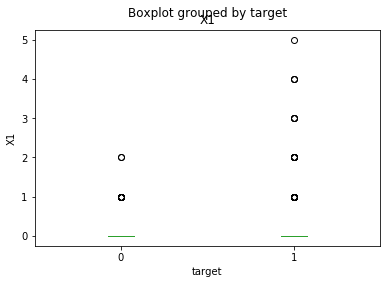

In [31]:
def t_test_function(rvs, alpha, no_test):
    counter = 0
    for i in range(no_test):
        rvs_random = stats.norm.rvs(loc=5, scale=10, size=1000, random_state=i+1)

        statistic, pvalue = stats.ttest_ind(rvs, rvs_random, equal_var=False)

        if pvalue <= alpha:
            counter = counter + 1

    print(counter)


def bonferroni_correction_function(rvs, alpha, no_test):
    alpha_bonferroni = alpha/no_test
    
    counter = 0
    for i in range(no_test):
        rvs_random = stats.norm.rvs(loc=5, scale=10, size=1000, random_state=i+1)

        statistic, pvalue = stats.ttest_ind(rvs, rvs_random, equal_var=False)

        if pvalue <= alpha_bonferroni:
            counter = counter + 1

    print(counter)


In [ ]:
def

In [ ]:
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

In [4]:
from datetime import datetime as dt

print(dt.today().strftime('%Y-%m-%d'))

2020-09-13 15:58:31.480638
